In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import csv


df = pd.read_csv(
    "/content/exports-to-american-countries.csv",
    on_bad_lines='skip',
    quotechar='"',
    engine='python'
)

top_100_commodities = (
    df.groupby('commodity')['value_qt']
    .sum()
    .sort_values(ascending=False)
    .head(100)
    .index
)


filtered_df = df[df['commodity'].isin(top_100_commodities)]


print(filtered_df)


filtered_df.to_csv('top_100_commodities_full_data.csv', index=False)

            id        date              country_name alpha_3_code  \
23          23  2022-01-01        Dominican Republic          DOM   
24          24  2022-01-01                    Mexico          MEX   
25          25  2022-01-01  United States of America          USA   
28          28  2022-01-01                    Canada          CAN   
29          29  2022-01-01        Dominican Republic          DOM   
...        ...         ...                       ...          ...   
179799  179799  2022-04-01                 Guatemala          GTM   
179800  179800  2022-04-01                  Honduras          HND   
179801  179801  2022-04-01                    Mexico          MEX   
179802  179802  2022-04-01                      Peru          PER   
179803  179803  2022-04-01  United States of America          USA   

        country_code    region  region_code                       sub_region  \
23               214  Americas           19  Latin America and the Caribbean   
24         


# **FILTERED TOP 100 COMMODITIES**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
dataFrame = pd.read_csv("/content/top_100_commodities_full_data.csv")

In [ ]:
dataFrame.head()

,id,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
0,23,2022-01-01,Dominican Republic,DOM,214,Americas,19,Latin America and the Caribbean,419,3049900,Other,Kgs,26.76,109.13,0.15
1,24,2022-01-01,Mexico,MEX,484,Americas,19,Latin America and the Caribbean,419,3049900,Other,Kgs,24.25,78.60,0.11
2,25,2022-01-01,United States of America,USA,840,Americas,19,Northern America,21,3049900,Other,Kgs,253.45,1804.65,2.42
3,28,2022-01-01,Canada,CAN,124,Americas,19,Northern America,21,3061720,Vannamei Shrimp (Litopenaeus Vannamei),Kgs,1077.89,7471.03,10.04
4,29,2022-01-01,Dominican Republic,DOM,214,Americas,19,Latin America and the Caribbean,419,3061720,Vannamei Shrimp (Litopenaeus Vannamei),Kgs,227.31,937.09,1.26


**DESCRIPTIVE ANALYSIS OF THE DATA**

In [ ]:
dataFrame.describe()

,id,country_code,region_code,sub_region_code,hs_code,value_qt,value_rs,value_dl
count,24891.000000,24891.000000,24891.0,24891.000000,2.489100e+04,24891.000000,24891.000000,24891.000000
mean,90833.775622,417.147242,19.0,291.498011,6.165978e+07,829.087971,931.909094,1.168961
std,51996.687725,300.192497,0.0,185.715966,2.268760e+07,9990.805157,8667.999367,10.805314
min,23.000000,28.000000,19.0,21.000000,3.023900e+06,0.000000,0.070000,0.000000
25%,44850.000000,124.000000,19.0,21.000000,4.202229e+07,0.170000,2.710000,0.000000
50%,91033.000000,328.000000,19.0,419.000000,6.302609e+07,3.350000,22.740000,0.030000
75%,136578.500000,780.000000,19.0,419.000000,8.438809e+07,43.615000,142.330000,0.180000
max,179803.000000,862.000000,19.0,419.000000,9.805900e+07,601083.000000,468538.540000,567.180000


In [ ]:
dataFrame.shape

(24891, 15)

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24891 entries, 0 to 24890
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               24891 non-null  int64  
 1   date             24891 non-null  object 
 2   country_name     24891 non-null  object 
 3   alpha_3_code     24891 non-null  object 
 4   country_code     24891 non-null  int64  
 5   region           24891 non-null  object 
 6   region_code      24891 non-null  int64  
 7   sub_region       24891 non-null  object 
 8   sub_region_code  24891 non-null  int64  
 9   hs_code          24891 non-null  int64  
 10  commodity        24891 non-null  object 
 11  unit             24891 non-null  object 
 12  value_qt         24891 non-null  float64
 13  value_rs         24891 non-null  float64
 14  value_dl         24891 non-null  float64
dtypes: float64(3), int64(5), object(7)
memory usage: 2.8+ MB


**EDA PROCESS**

In [ ]:
dataFrame.isnull().sum()

,0
id,0
date,0
country_name,0
alpha_3_code,0
country_code,0
region,0
region_code,0
sub_region,0
sub_region_code,0
hs_code,0


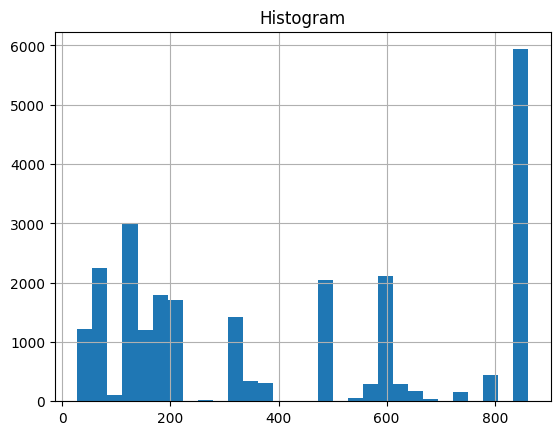

In [ ]:
dataFrame['country_code'].hist(bins=30)
plt.title("Histogram")
plt.show()

AS THE DATA IN THE COUNTRY_CODE COLUMN IS NOT NORMALLY DISTRIBUTED, SO WE WILL  THE MISSING VALUE WITH MEDIAN OF THE COUNTRY_CODE COLUMN

In [ ]:
dataFrame['country_code'] = dataFrame['country_code'].fillna(dataFrame['country_code'].median())

In [ ]:
dataFrame = dataFrame.dropna(subset=['alpha_3_code'])


In [ ]:
dataFrame.isnull().sum()

,0
id,0
date,0
country_name,0
alpha_3_code,0
country_code,0
region,0
region_code,0
sub_region,0
sub_region_code,0
hs_code,0


# Data Transformation


In [ ]:
dataFrame['country_code'] = dataFrame['country_code'].astype(int)

In [ ]:
dataFrame['country_code']

,country_code
0,214
1,484
2,840
3,124
4,214
...,...
24886,320
24887,340
24888,484
24889,604


In [ ]:
dataFrame.head()

,id,date,country_name,alpha_3_code,country_code,region,region_code,sub_region,sub_region_code,hs_code,commodity,unit,value_qt,value_rs,value_dl
0,23,2022-01-01,Dominican Republic,DOM,214,Americas,19,Latin America and the Caribbean,419,3049900,Other,Kgs,26.76,109.13,0.15
1,24,2022-01-01,Mexico,MEX,484,Americas,19,Latin America and the Caribbean,419,3049900,Other,Kgs,24.25,78.60,0.11
2,25,2022-01-01,United States of America,USA,840,Americas,19,Northern America,21,3049900,Other,Kgs,253.45,1804.65,2.42
3,28,2022-01-01,Canada,CAN,124,Americas,19,Northern America,21,3061720,Vannamei Shrimp (Litopenaeus Vannamei),Kgs,1077.89,7471.03,10.04
4,29,2022-01-01,Dominican Republic,DOM,214,Americas,19,Latin America and the Caribbean,419,3061720,Vannamei Shrimp (Litopenaeus Vannamei),Kgs,227.31,937.09,1.26


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["value_qt", "value_rs", "value_dl"]] = scaler.fit_transform(df[["value_qt", "value_rs", "value_dl"]])


In [ ]:
dframe = df.dropna(subset=['region_code'])
columns_to_keep = [col for col in dframe.columns if col not in ['region_code', 'region']]
filtered_dframe = dframe[columns_to_keep]

correlation_matrix = filtered_dframe.corr(numeric_only=True)

print(correlation_matrix)


                       id  country_name  alpha_3_code  country_code  \
id               1.000000     -0.002834     -0.000705     -0.002169   
country_name    -0.002834      1.000000      0.952290      0.951192   
alpha_3_code    -0.000705      0.952290      1.000000      0.971919   
country_code    -0.002169      0.951192      0.971919      1.000000   
sub_region      -0.012874      0.385429      0.361367      0.428221   
sub_region_code  0.012874     -0.385429     -0.361367     -0.428221   
hs_code          0.051294      0.006119     -0.007089     -0.011010   
commodity        0.014726     -0.002749     -0.004691     -0.005712   
unit             0.022140      0.025413      0.017565      0.020401   
value_qt        -0.000439      0.026168      0.024654      0.027609   
value_rs         0.003181      0.051855      0.049787      0.054308   
value_dl         0.002761      0.051793      0.049728      0.054249   

                 sub_region  sub_region_code   hs_code  commodity      unit 

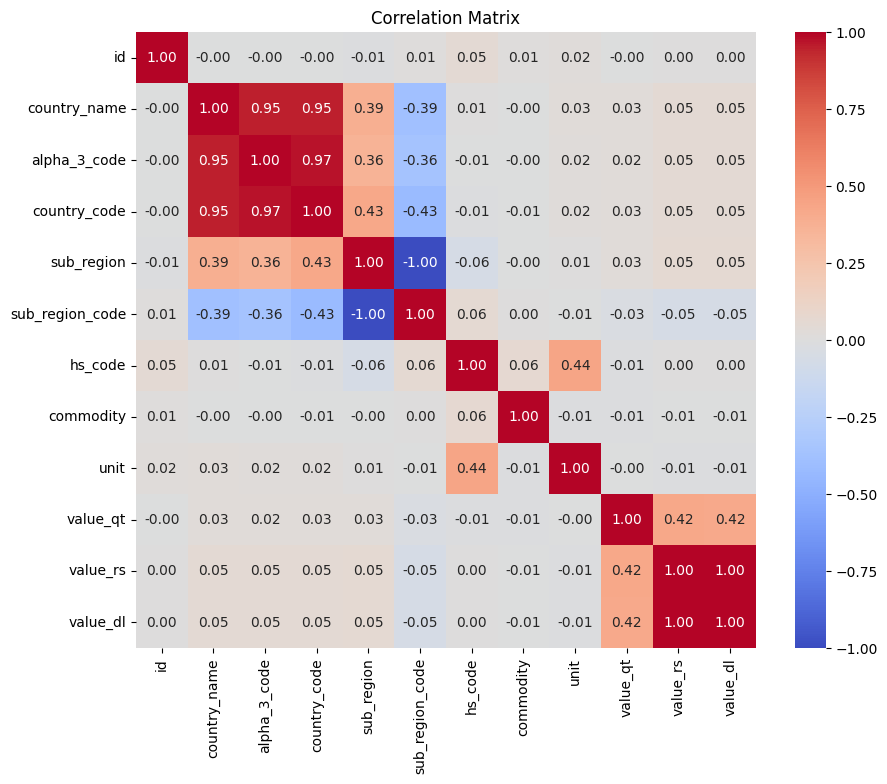

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Detecting the outliers using visualization or Z-score


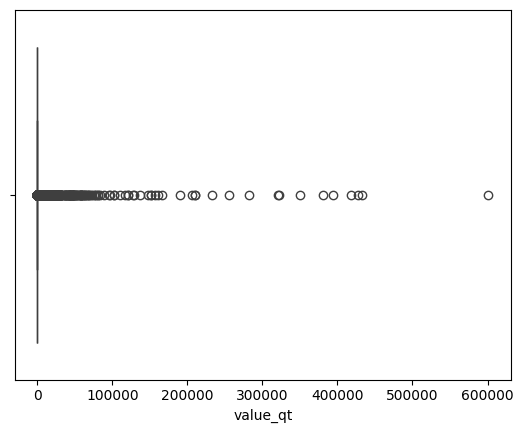

In [ ]:
sns.boxplot(x=dataFrame['value_qt'])
plt.show()

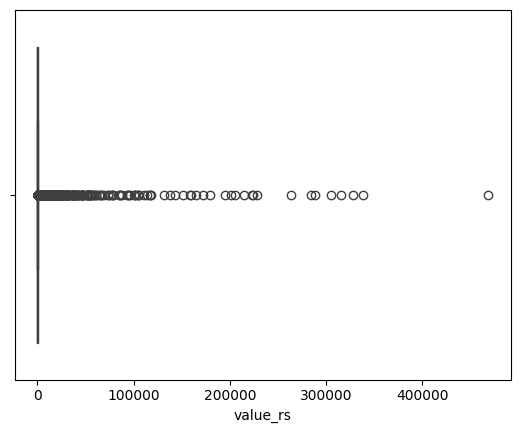

In [ ]:
sns.boxplot(x=dataFrame['value_rs'])
plt.show()

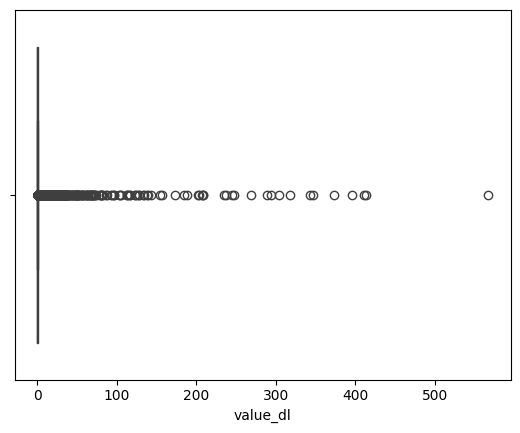

In [ ]:
sns.boxplot(x=dataFrame['value_dl'])
plt.show()

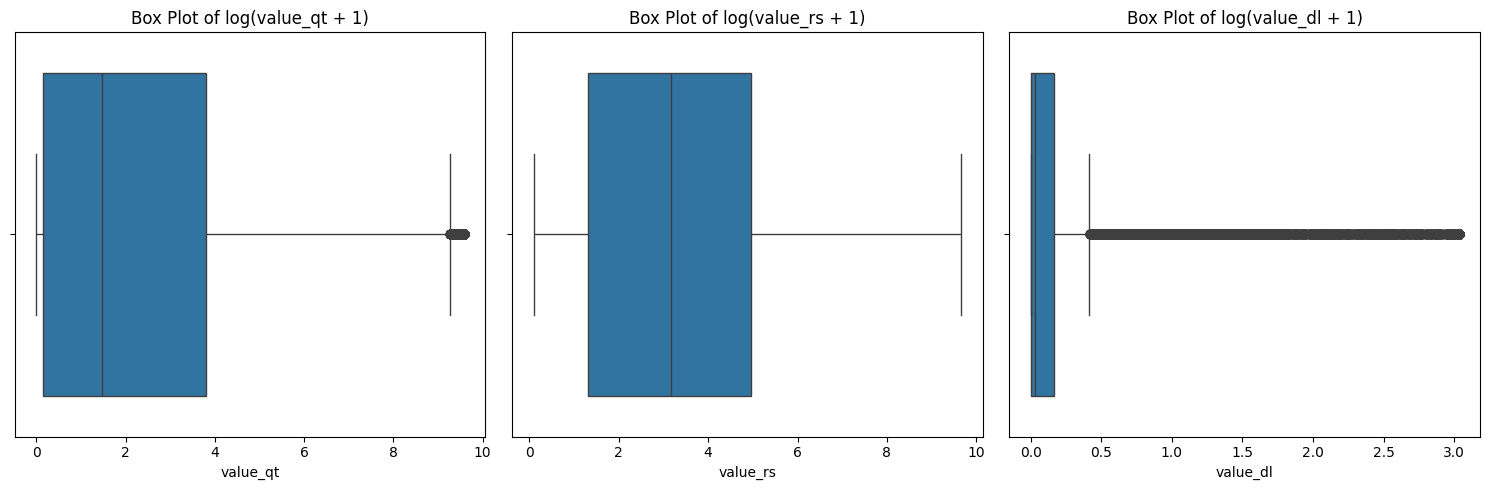

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for better visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for 'value_qt'
sns.boxplot(x=np.log1p(dataFrame['value_qt']), ax=axes[0])
axes[0].set_title("Box Plot of log(value_qt + 1)")

# Box plot for 'value_rs'
sns.boxplot(x=np.log1p(dataFrame['value_rs']), ax=axes[1])
axes[1].set_title("Box Plot of log(value_rs + 1)")

# Box plot for 'value_dl'
sns.boxplot(x=np.log1p(dataFrame['value_dl']), ax=axes[2])
axes[2].set_title("Box Plot of log(value_dl + 1)")

plt.tight_layout()  # Adjusts subplot params for a tight layout
plt.show()

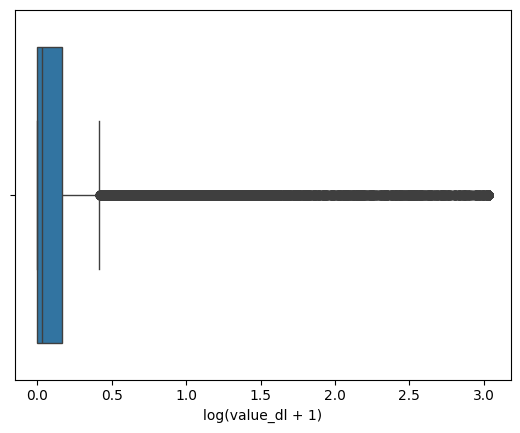

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Add 1 to avoid log(0)
sns.boxplot(x=np.log1p(dataFrame['value_dl']))
plt.xlabel("log(value_dl + 1)")
plt.show()


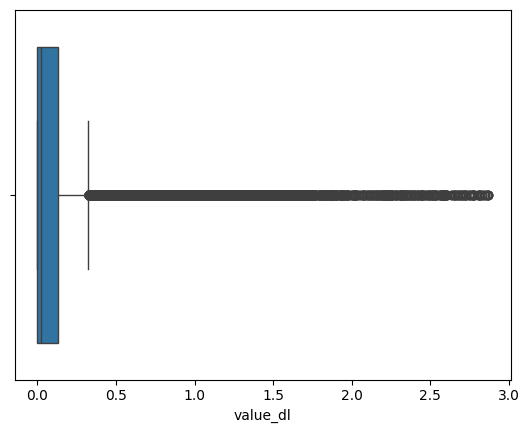

In [ ]:
filtered_df = dataFrame[dataFrame['value_dl'] < dataFrame['value_dl'].quantile(0.95)]
sns.boxplot(x=filtered_df['value_dl'])
plt.show()


In [ ]:
Q1 = dataFrame['value_dl'].quantile(0.25)
Q3 = dataFrame['value_dl'].quantile(0.75)
IQR = Q3 - Q1

outliers = dataFrame[(dataFrame['value_dl'] < Q1 - 1.5 * IQR) |
                     (dataFrame['value_dl'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {len(outliers)}")

# Remove
cleaned_df = dataFrame[(dataFrame['value_dl'] >= Q1 - 1.5 * IQR) &
                       (dataFrame['value_dl'] <= Q3 + 1.5 * IQR)]

# OR Cap (Winsorization)
capped_df = dataFrame.copy()
capped_df['value_dl'] = np.clip(dataFrame['value_dl'], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)


Number of outliers: 3878


In [ ]:
# Calculate quantiles and IQR for 'value_qt'
Q1_qt = dataFrame['value_qt'].quantile(0.25)
Q3_qt = dataFrame['value_qt'].quantile(0.75)
IQR_qt = Q3_qt - Q1_qt

# Identify outliers in 'value_qt'
outliers_qt = dataFrame[(dataFrame['value_qt'] < Q1_qt - 1.5 * IQR_qt) |
                         (dataFrame['value_qt'] > Q3_qt + 1.5 * IQR_qt)]
print(f"Number of outliers in 'value_qt': {len(outliers_qt)}")


# 1. Remove outliers:
cleaned_df_qt = dataFrame[(dataFrame['value_qt'] >= Q1_qt - 1.5 * IQR_qt) &
                           (dataFrame['value_qt'] <= Q3_qt + 1.5 * IQR_qt)]

# 2. Cap outliers (Winsorization):
capped_df_qt = dataFrame.copy()
capped_df_qt['value_qt'] = np.clip(dataFrame['value_qt'], Q1_qt - 1.5 * IQR_qt, Q3_qt + 1.5 * IQR_qt)

Number of outliers in 'value_qt': 4212


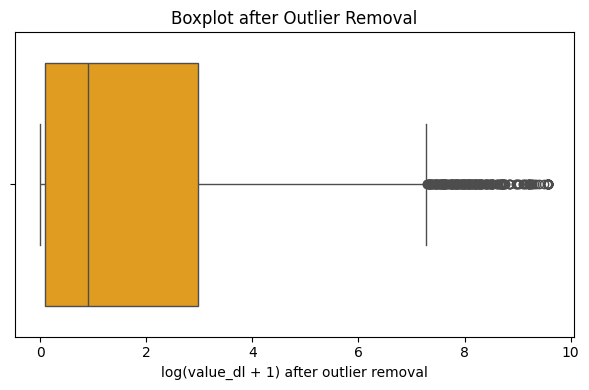

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=np.log1p(cleaned_df['value_qt']), color='orange')
plt.xlabel("log(value_dl + 1) after outlier removal")
plt.title("Boxplot after Outlier Removal")
plt.tight_layout()
plt.show()

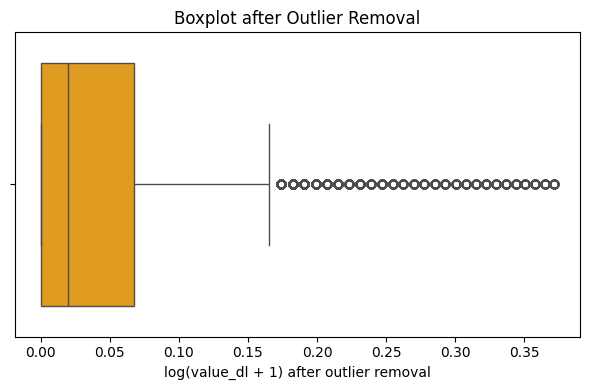

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=np.log1p(cleaned_df['value_dl']), color='orange')
plt.xlabel("log(value_dl + 1) after outlier removal")
plt.title("Boxplot after Outlier Removal")
plt.tight_layout()
plt.show()

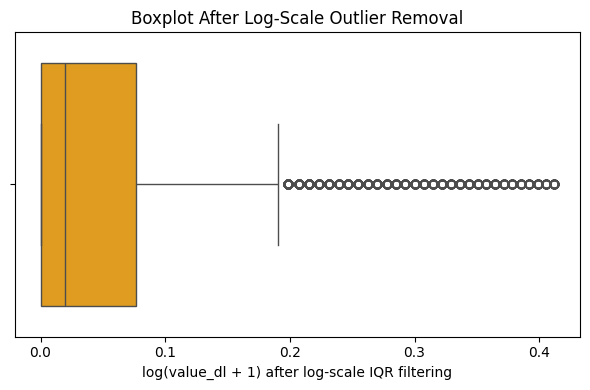

In [ ]:
# Log-transform the data
dataFrame['log_value_dl'] = np.log1p(dataFrame['value_dl'])

# Recalculate IQR on log-transformed data
Q1_log = dataFrame['log_value_dl'].quantile(0.25)
Q3_log = dataFrame['log_value_dl'].quantile(0.75)
IQR_log = Q3_log - Q1_log

# Remove outliers based on log scale
filtered_log_df = dataFrame[
    (dataFrame['log_value_dl'] >= Q1_log - 1.5 * IQR_log) &
    (dataFrame['log_value_dl'] <= Q3_log + 1.5 * IQR_log)
]

# Plot cleaned log-transformed boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=filtered_log_df['log_value_dl'], color='orange')
plt.xlabel("log(value_dl + 1) after log-scale IQR filtering")
plt.title("Boxplot After Log-Scale Outlier Removal")
plt.tight_layout()
plt.show()


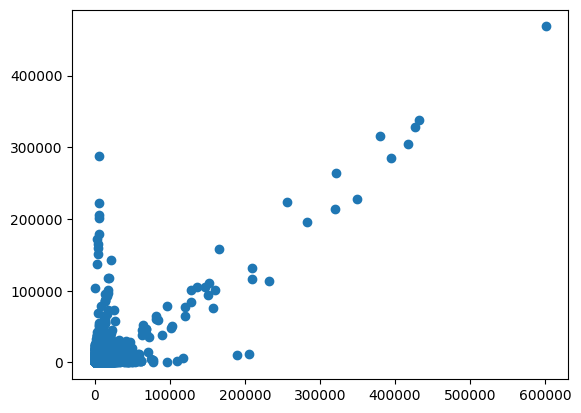

In [ ]:
plt.scatter(dataFrame['value_qt'], dataFrame['value_rs'])
plt.show()


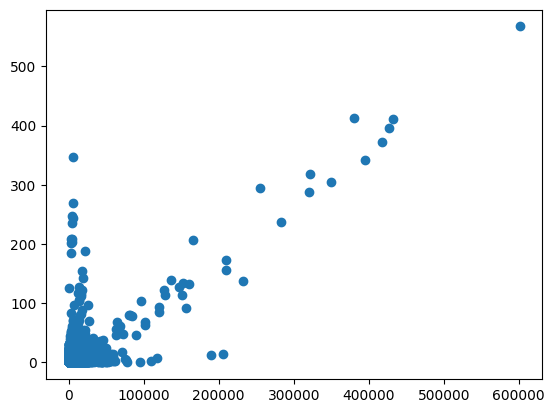

In [ ]:
plt.scatter(dataFrame['value_qt'], dataFrame['value_dl'])
plt.show()


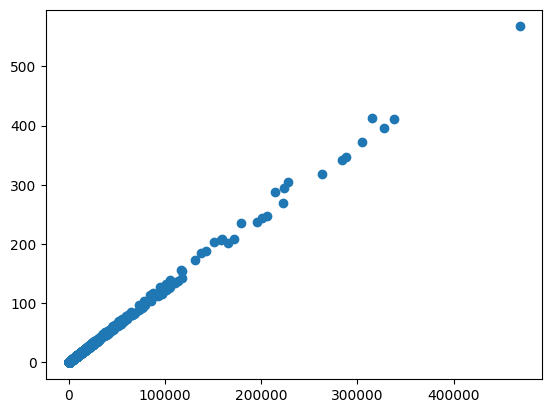

In [ ]:
plt.scatter(dataFrame['value_rs'], dataFrame['value_dl'])
plt.show()


In [ ]:
from scipy.stats import zscore

z_scores = zscore(dataFrame['value_qt'])
outliers = dataFrame[abs(z_scores) > 3]
print("Outliers:")
print(outliers)


Outliers:
           id        date              country_name alpha_3_code  \
88       1302  2022-01-01  United States of America          USA   
92       1343  2022-01-01  United States of America          USA   
94       1345  2022-01-01                    Brazil          BRA   
95       1346  2022-01-01  United States of America          USA   
96       1347  2022-01-01                    Brazil          BRA   
...       ...         ...                       ...          ...   
23103  167295  2022-04-01                    Brazil          BRA   
23104  167296  2022-04-01                    Brazil          BRA   
24097  174450  2022-04-01  United States of America          USA   
24547  176899  2022-04-01  United States of America          USA   
24559  176929  2022-04-01  United States of America          USA   

       country_code    region  region_code                       sub_region  \
88              840  Americas           19                 Northern America   
92             

# **HANDLING OUTLIERS**

In [ ]:

col = 'value_qt'

# Calculating  1st and 99th percentiles
lower = dataFrame[col].quantile(0.01)
upper = dataFrame[col].quantile(0.99)


dataFrame[col] = dataFrame[col].clip(lower, upper)


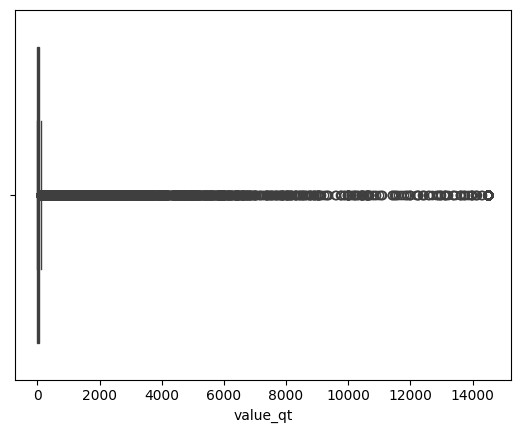

In [ ]:
sns.boxplot(x=dataFrame['value_qt'])
plt.show()


In [ ]:

col = 'value_rs'

lower = dataFrame[col].quantile(0.01)
upper = dataFrame[col].quantile(0.99)

dataFrame[col] = dataFrame[col].clip(lower, upper)


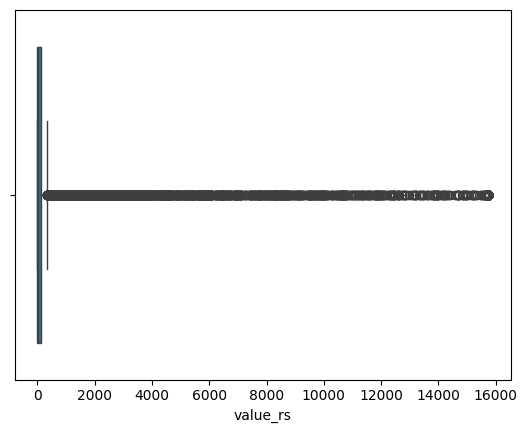

In [ ]:
sns.boxplot(x=dataFrame['value_rs'])
plt.show()


In [ ]:

col = 'value_dl'

lower = dataFrame[col].quantile(0.01)
upper = dataFrame[col].quantile(0.99)

dataFrame[col] = dataFrame[col].clip(lower, upper)


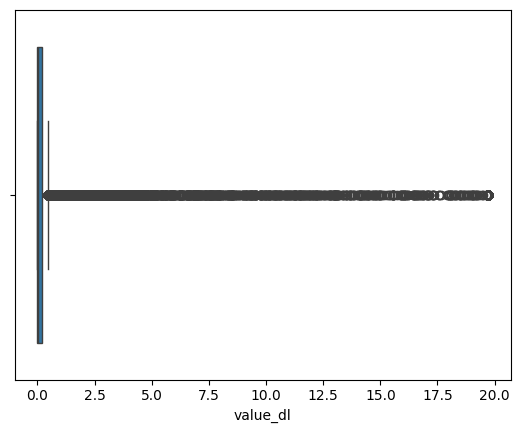

In [ ]:
sns.boxplot(x=dataFrame['value_dl'])
plt.show()


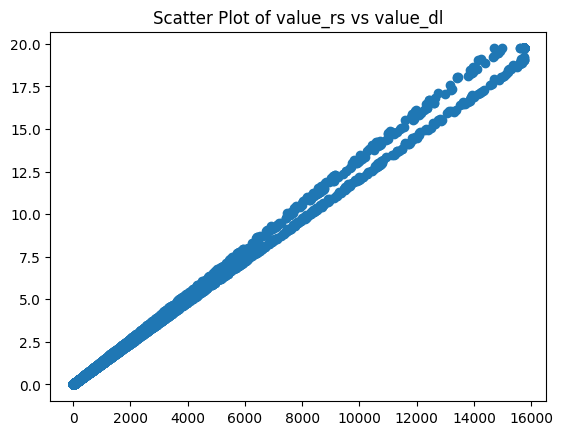

In [ ]:
plt.scatter(dataFrame['value_rs'], dataFrame['value_dl'])
plt.title('Scatter Plot of value_rs vs value_dl')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['country_name', 'alpha_3_code', 'region', 'sub_region', 'commodity', 'unit']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


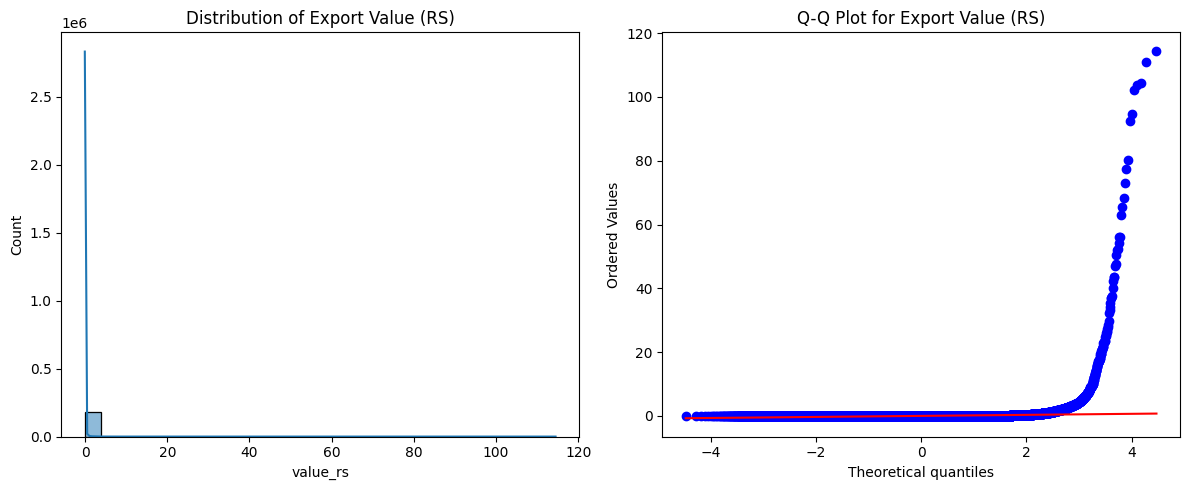

Shapiro-Wilk Test for value_rs: W=0.026, p-value=0.000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 179857.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, probplot

# Histogram and Q-Q plot for 'value_dl'
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['value_rs'], bins=30, kde=True)
plt.title("Distribution of Export Value (RS)")

# Q-Q plot
plt.subplot(1, 2, 2)
probplot(df['value_rs'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Export Value (RS)")

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
stat, p = shapiro(df['value_rs'])
print(f"Shapiro-Wilk Test for value_rsa: W={stat:.3f}, p-value={p:.3f}")

In [ ]:
dataFrame['commodity'].unique()

array(['Other', 'Vannamei Shrimp (Litopenaeus Vannamei)', 'Natural Honey',
       'Rice Parboiled', 'Basmati Rice', 'Others', 'Other Soya Beans',
       '*Guargum Treated And Pulverised', '0Thers',
       'Castor Oilandits Frctns Othr Thn Edble Grade',
       'Othr Refnd Sugar Includng Centrifugal Sugr',
       'Cucmbrs And Ghrkns Prpd/Prsvd By Acetic Acid',
       'Other Food Preparation Nes',
       'Oil-Cake And Oil-Cake Meal Of Soya Bean Expeller Variety',
       'Barytes Lumps', 'Granite Crude Or Roughly Trimmed',
       'Othr Ballast Shingle And Flnt W/N Ht-Treated',
       'Aviation Turbine Fuel (Atf)',
       'Automotive Diesel Fuel, Not Containing Biodiesel, Conforming To Standard Is 1460',
       'High Flash High Speed Diesel Fuel Conforming To Standard Is 16861',
       'Benzene', 'P-Xylene', 'Other Medcne Put Up For Retail Sale N.E.S',
       'Other Insecticide Nes', 'Others Fungicide Nes',
       'Other Herbicides-Anti-Sprouting Products',
       'Other Polymers Of Venyl C

In [ ]:
import pandas as pd

def categorize_commodity(commodity):
    commodity = commodity.lower()

    # Food-related keywords
    if any(word in commodity for word in ['shrimp', 'prawns', 'honey', 'rice', 'flour', 'oil', 'soy', 'cake', 'fruit', 'sugar', 'wheat', 'maize', 'milk', 'butter', 'cheese', 'eggs', 'meat', 'poultry', 'fish', 'seafood', 'vegetables']):
        return 'Food'

    # Textile / Clothing
    elif any(word in commodity for word in ['cotton', 'polyester', 'yarn', 'fiber', 't-shirt', 'underpants', 'linen', 'textile', 'fabric', 'clothing', 'apparel', 'garment']):
        return 'Textile & Clothing'

    # Furniture / Wood
    elif any(word in commodity for word in ['timber', 'granite', 'marble', 'slabs', 'wood', 'planks', 'furniture', 'cabinet', 'table', 'chair']):
        return 'Furniture/Construction'

    # Electronics
    elif any(word in commodity for word in ['electro', 'capacitor', 'resistor', 'transistor', 'circuit', 'electronic', 'computer', 'phone', 'television']):
        return 'Electronics'

    # Medical
    elif any(word in commodity for word in ['syringe', 'needle', 'surgical', 'medicine', 'cardiograph', 'medical', 'drug', 'pharmaceutical', 'hospital']):
        return 'Medical Equipment'

    # Chemical
    elif any(word in commodity for word in ['acid', 'chemical', 'fungicide', 'pesticide', 'benzene', 'fertilizer', 'plastic', 'resin']):
        return 'Chemicals'

    # Metal / Machinery
    elif any(word in commodity for word in ['iron', 'steel', 'alloy', 'manganese', 'copper', 'machinery', 'engine', 'vehicle', 'equipment', 'tool']):
        return 'Metal & Machinery'

    # Plastic & Rubber
    elif any(word in commodity for word in ['plastic', 'polyethylene', 'rubber', 'polymer', 'tire', 'synthetic']):
        return 'Plastic & Rubber'

    # Gems and Jewelry
    elif any(word in commodity for word in ['gold', 'silver', 'diamond', 'gem', 'jewelry']):
        return 'Gems and Jewelry'

    # Mineral Fuels
    elif any(word in commodity for word in ['coal', 'oil', 'gas', 'petroleum', 'fuel']):
        return 'Mineral Fuels'

    elif any(word in commodity for word in ['pen', 'pencil', 'notebook', 'paper', 'stapler', 'ruler', 'scissors', 'eraser', 'marker', 'crayon','Liquid Ink']):
        return 'Stationary'

    # Others
    else:
        return 'Other'


df['commodity_category'] = df['commodity'].apply(categorize_commodity)


print(df['commodity_category'].value_counts())

commodity_category
Other                     128547
Textile & Clothing         10812
Metal & Machinery          10142
Food                        7743
Chemicals                   7014
Plastic & Rubber            3755
Furniture/Construction      3242
Medical Equipment           3021
Stationary                  1964
Mineral Fuels               1678
Electronics                 1442
Gems and Jewelry             497
Name: count, dtype: int64


In [ ]:
from scipy.stats import ttest_ind

usa = df[df['country_name'] == 'United States of America']['value_rs']
mexico = df[df['country_name'] == 'Mexico']['value_rs']

t_stat, p_val = ttest_ind(usa, mexico, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 16.50352988247496, P-value: 4.999196906804319e-61


 The results strongly suggest that the export values of the USA and Mexico are not the same. The average export value for one of these countries is significantly different from the other.

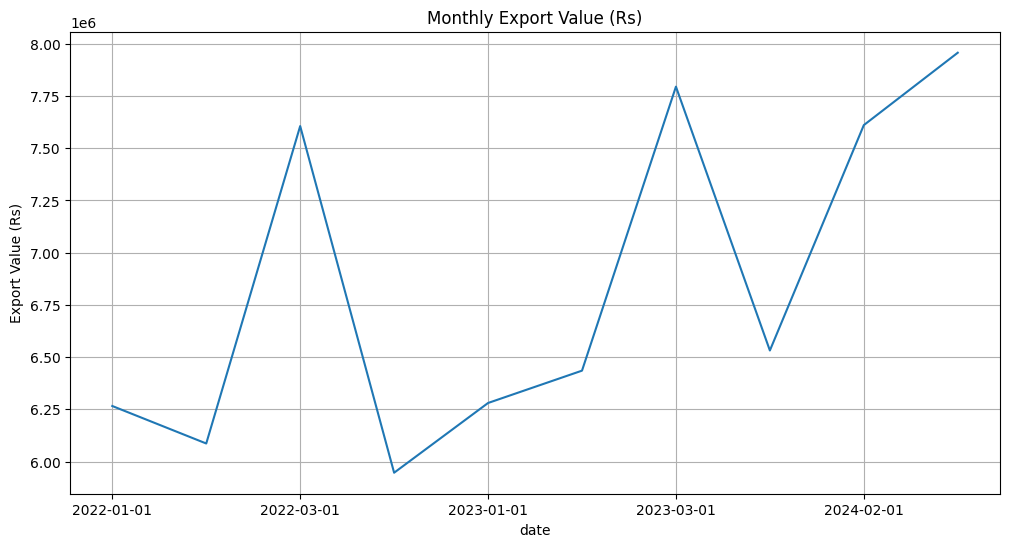

In [ ]:
monthly_ts = df.groupby('date')['value_rs'].sum()

# Plot time series
import matplotlib.pyplot as plt
monthly_ts.plot(title="Monthly Export Value (Rs)", figsize=(12,6))
plt.ylabel("Export Value (Rs)")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Predicting Export Value

In [ ]:
# Encoding categorical variables
dataFrame_encoded = dataFrame.copy()
dataFrame_encoded['commodity'] = LabelEncoder().fit_transform(dataFrame_encoded['commodity'])
dataFrame_encoded['country_name'] = LabelEncoder().fit_transform(dataFrame_encoded['country_name'])

# Features & target
X = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y = dataFrame_encoded['value_dl']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

# Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

Linear Regression R²: 0.9990209095335999
Linear Regression RMSE: 0.08266886143956388
Linear Regression MSE: 0.006834140651713811


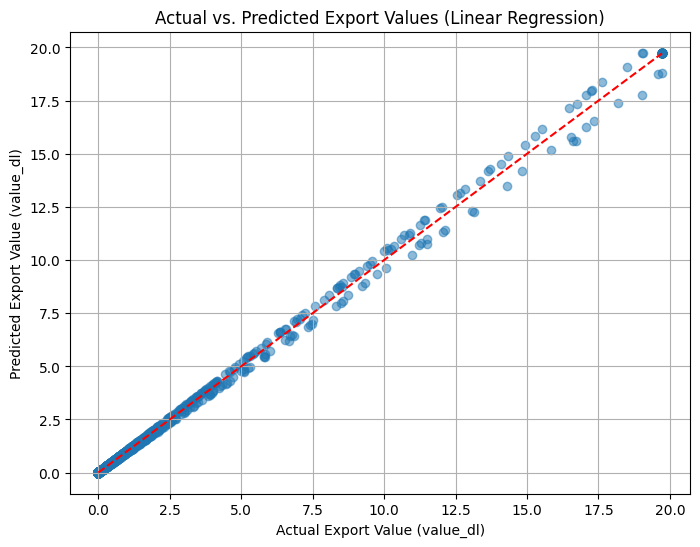

In [ ]:
# prompt: geneate the graph for linear regresssion any other graph

import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are available from your previous code
# Example:  y_test and y_pred from the Linear Regression section

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Alpha controls transparency of points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference

plt.xlabel("Actual Export Value (value_dl)")
plt.ylabel("Predicted Export Value (value_dl)")
plt.title("Actual vs. Predicted Export Values (Linear Regression)")
plt.grid(True)
plt.show()


Random Forest R²: 0.9986776824189924
Random Forest RMSE: 0.0960723538800321
Random Forest MSE: 0.00922989718005012


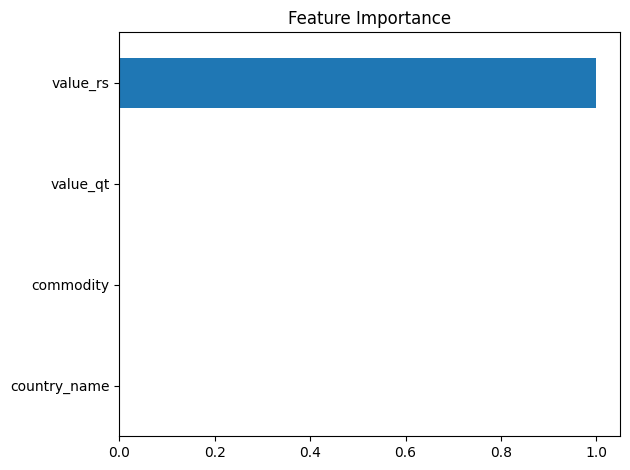

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))

# Feature Importance Plot
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', title="Feature Importance")
plt.tight_layout()
plt.show()


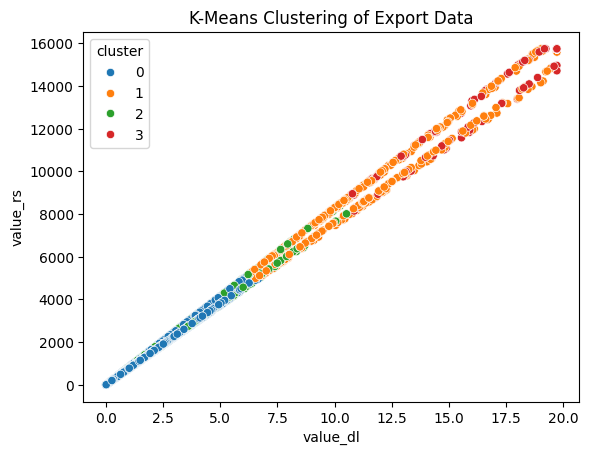

In [ ]:
# Clustering on export patterns
X_cluster = dataFrame_encoded[['value_dl', 'value_qt', 'value_rs']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
dataFrame_encoded['cluster'] = kmeans.fit_predict(X_scaled)

# Visualization
sns.scatterplot(data=dataFrame_encoded, x='value_dl', y='value_rs', hue='cluster', palette='tab10')
plt.title("K-Means Clustering of Export Data")
plt.show()


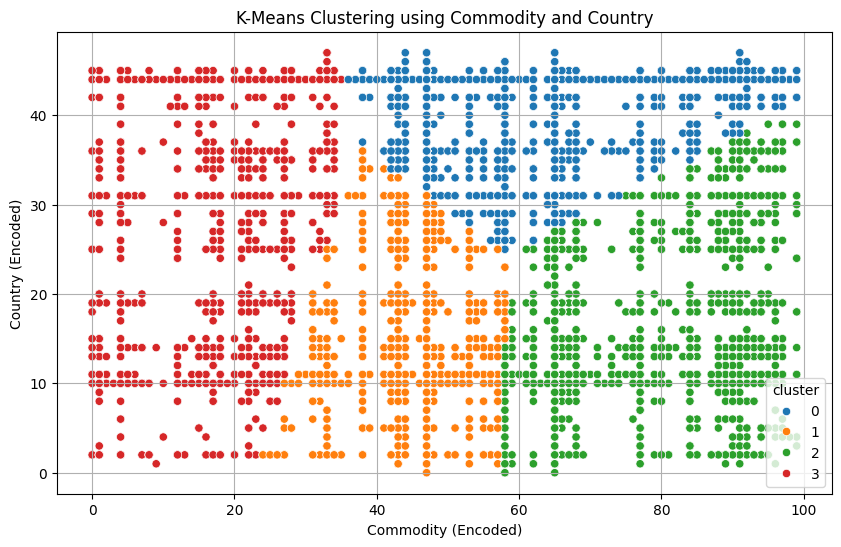

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy to avoid modifying original
dataFrame_cluster_cat = dataFrame.copy()

# Encode 'commodity' and 'country' as numerical features
dataFrame_cluster_cat['commodity_encoded'] = LabelEncoder().fit_transform(dataFrame_cluster_cat['commodity'])
dataFrame_cluster_cat['country_encoded'] = LabelEncoder().fit_transform(dataFrame_cluster_cat['country_name'])

# Feature selection
X_cluster_cat = dataFrame_cluster_cat[['commodity_encoded', 'country_encoded']]

# Apply KMeans
kmeans_cat = KMeans(n_clusters=4, random_state=42)
dataFrame_cluster_cat['cluster'] = kmeans_cat.fit_predict(X_cluster_cat)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataFrame_cluster_cat,
    x='commodity_encoded',
    y='country_encoded',
    hue='cluster',
    palette='tab10'
)
plt.title("K-Means Clustering using Commodity and Country")
plt.xlabel("Commodity (Encoded)")
plt.ylabel("Country (Encoded)")
plt.grid(True)
plt.show()


In [ ]:
print(dataFrame_cluster_cat['commodity_encoded'])

0        47
1        47
2        47
3        99
4        99
         ..
24886     1
24887     1
24888     1
24889     1
24890     1
Name: commodity_encoded, Length: 24891, dtype: int64


 **Clusters indicate groups of country-commodity pairs that share similar export behavior or patterns**

**Cluster 0 (Blue):** Appears concentrated in high commodity-encoded IDs and across mid-to-high country ranges. This could mean certain countries consistently import/export similar types of commodities.

**Cluster 1 (Orange):** Lies in the middle range for both commodities and countries, possibly showing common trade activities among a central group.

**Cluster 2 (Green):** Occupies the higher commodity ID range but a broad country range, indicating that a particular set of commodities is being traded across many countries.

**Cluster 3 (Red):** Spans low-to-mid commodity IDs and across nearly all countries — suggesting some commodities are universally traded across various countries.

In [ ]:
# Binary classification: high export vs low
median_value = dataFrame_encoded['value_dl'].median()
dataFrame_encoded['export_class'] = (dataFrame_encoded['value_dl'] > median_value).astype(int)

X_cls = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y_cls = dataFrame_encoded['export_class']

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_cls = log_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_cls))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2614
           1       0.99      0.99      0.99      2365

    accuracy                           0.99      4979
   macro avg       0.99      0.99      0.99      4979
weighted avg       0.99      0.99      0.99      4979



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create binary classification based on median value
median_value = dataFrame_encoded['value_dl'].median()
dataFrame_encoded['export_class'] = (dataFrame_encoded['value_dl'] > median_value).astype(int)

# Feature selection
X_cls = dataFrame_encoded[['value_qt', 'value_rs', 'commodity', 'country_name']]
y_cls = dataFrame_encoded['export_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predictions
y_pred_cls = tree_model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred_cls))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2614
           1       0.99      0.99      0.99      2365

    accuracy                           0.99      4979
   macro avg       0.99      0.99      0.99      4979
weighted avg       0.99      0.99      0.99      4979



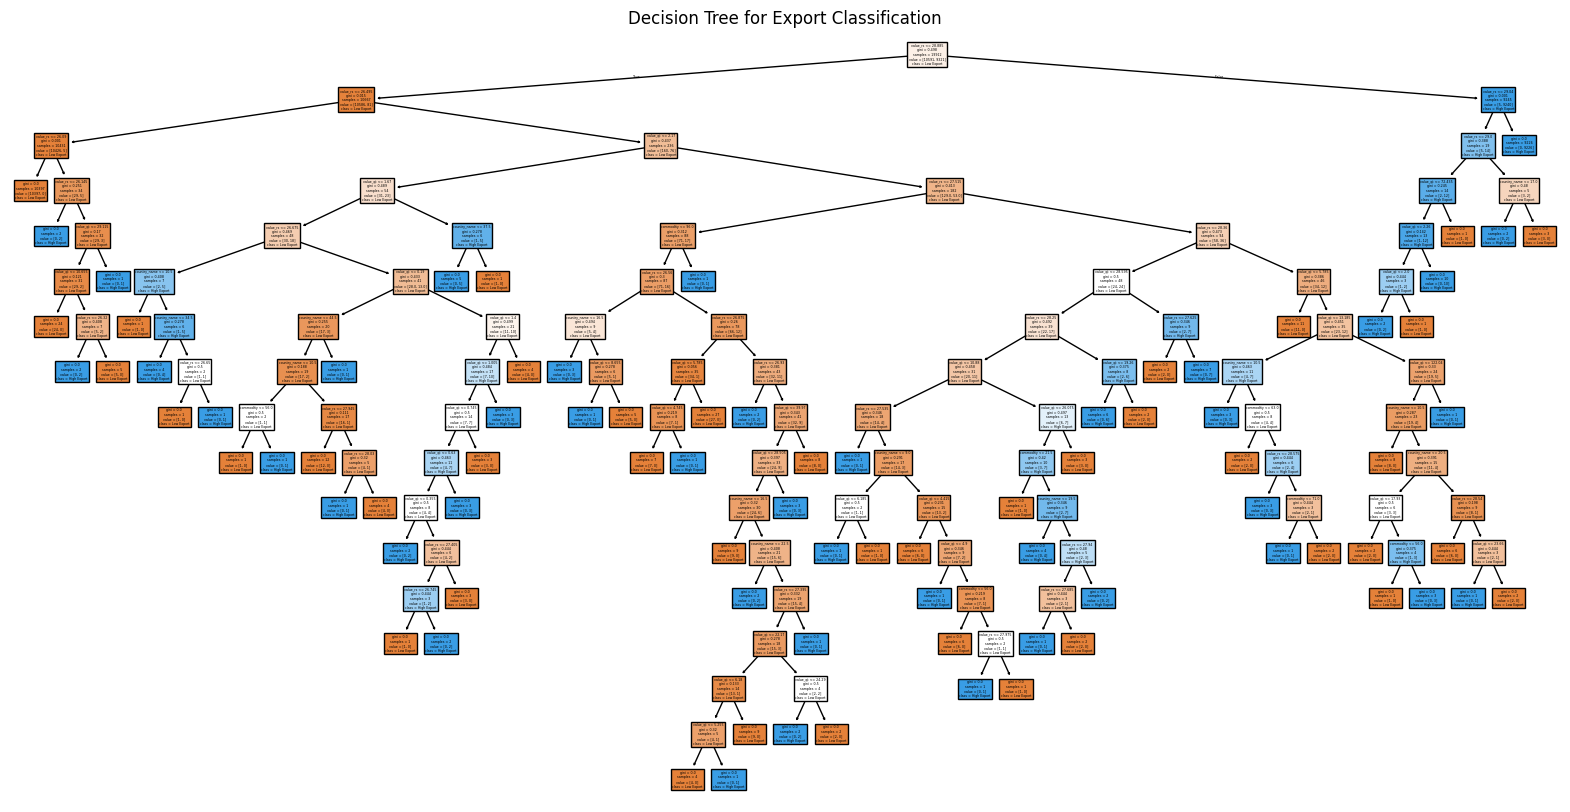

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X_cls.columns, class_names=["Low Export", "High Export"], filled=True)
plt.title("Decision Tree for Export Classification")
plt.show()


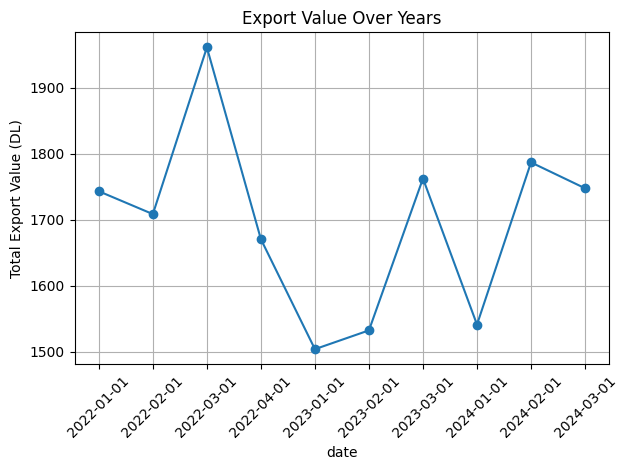

In [ ]:
if 'date' in dataFrame.columns:
    df_ts = dataFrame.groupby('date')['value_dl'].sum().reset_index()

    plt.plot(df_ts['date'], df_ts['value_dl'], marker='o')
    plt.title("Export Value Over Years")
    plt.xlabel("date")
    plt.ylabel("Total Export Value (DL)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
countries = dataFrame['country_name'].unique()
if len(countries) >= 2:
    vals1 = dataFrame[dataFrame['country_name'] == countries[0]]['value_dl']
    vals2 = dataFrame[dataFrame['country_name'] == countries[1]]['value_dl']
    t_stat, p_val = ttest_ind(vals1, vals2, equal_var=False)
    print(f"T-Test between {countries[0]} and {countries[1]}:\nT-Stat={t_stat:.2f}, P-value={p_val:.4f}")


T-Test between Dominican Republic and Mexico:
T-Stat=-7.53, P-value=0.0000


In [ ]:
from scipy.stats import f_oneway

commodity_groups = [group['value_dl'].values for _, group in dataFrame.groupby('commodity')]
anova_stat, anova_p = f_oneway(*commodity_groups)
print(f"ANOVA across commodities: F={anova_stat:.2f}, P={anova_p:.4f}")

ANOVA across commodities: F=50.07, P=0.0000
